In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
data = pd.read_csv('FUTIDX_BANKNIFTY_01-Mar-2020_TO_01-Jun-2020.csv')

In [3]:
df = pd.DataFrame(data)

In [5]:
df_out = pd.DataFrame()

In [6]:
df_out['Date'] = df['Date']

In [7]:
df_out['Settle Price'] = df['Settle Price']

In [8]:
df_out['Spot Price'] = df['Underlying Value']

In [9]:
interest = 4.40

In [11]:
df['Expiry'] = pd.to_datetime(df['Expiry'])

In [12]:
df['Date'] = pd.to_datetime(df['Date'])

C:\Users\Aishwarya Sahu\AppData\Local\Temp\ipykernel_24864\2394721818.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [14]:
# Calculating time to expiry in years:
df['Time to Expiry'] = (df['Expiry'] - df['Date']).dt.days / 366

In [15]:
def calc_model_price(interest, spot_price, time_to_expire):
    return spot_price * np.exp(interest / 100 * time_to_expire)

In [16]:
df_out['Model Price'] = round(calc_model_price(interest, df['Underlying Value'], df['Time to Expiry']), 2)

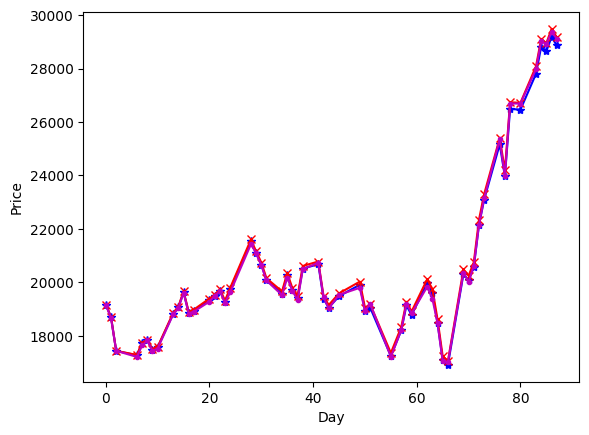

In [17]:
plt.plot((df['Expiry'] - df['Date']).dt.days, df_out['Spot Price'], 'b-', marker = '*')
plt.plot((df['Expiry'] - df['Date']).dt.days, df_out['Model Price'], 'r-', marker = 'x')
plt.plot((df['Expiry'] - df['Date']).dt.days, df_out['Settle Price'], 'm-', marker = '.')
plt.xlabel("Day")
plt.ylabel("Price")
plt.show()

In [18]:
df_out.to_csv('Future_Price_Comprision.csv', index = False)

In [19]:
mean_interest = (np.log(df['Settle Price'] / df['Underlying Value']) / df['Time to Expiry']).mean() * 100

In [20]:
percentage_error = abs((mean_interest - interest) / interest * 100)

In [21]:
possible_reason = """Possible reason for the steep decline in the underlying price:-
It was the time when India faces first COVID-19 Lockdown.
RBI rapidly changes it's monetory policies those days. Changes in the interest rate 
affect the cost of borrowing and the overall economic environment, which in turn influences 
market sentiment and the valuation of the underlying asset"""

In [22]:
print(possible_reason)

Possible reason for the steep decline in the underlying price:-
It was the time when India faces first COVID-19 Lockdown.
RBI rapidly changes it's monetory policies those days. Changes in the interest rate 
affect the cost of borrowing and the overall economic environment, which in turn influences 
market sentiment and the valuation of the underlying asset


In [23]:
print(f'The given interest rate is: {interest:.2f}%.')
print(f'After assuming settle price as model price the mean interest rate is: {new_interest:.2f}%.')
print(f'The percentage error is: {percentage_error:.2f}%')

The given interest rate is: 4.40%.


NameError: name 'new_interest' is not defined